In [10]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(gridExtra)
library(tidyverse)

set.seed(1)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


trestbps,chol,Class
<dbl>,<dbl>,<dbl>
145,233,0
160,286,2
120,229,1
130,250,0
130,204,0
120,236,0


trestbps,chol,Heart_Disease
<chr>,<chr>,<chr>
HIGH,LOW,NO
HIGH,HIGH,YES
LOW,LOW,YES
HIGH,HIGH,NO
HIGH,LOW,NO
LOW,LOW,NO


trestbps,Heart_Disease
<chr>,<chr>
HIGH,NO
HIGH,YES
LOW,YES
HIGH,NO
HIGH,NO
LOW,NO


chol,Heart_Disease
<chr>,<chr>
LOW,NO
HIGH,YES
LOW,YES
HIGH,NO
LOW,NO
LOW,NO


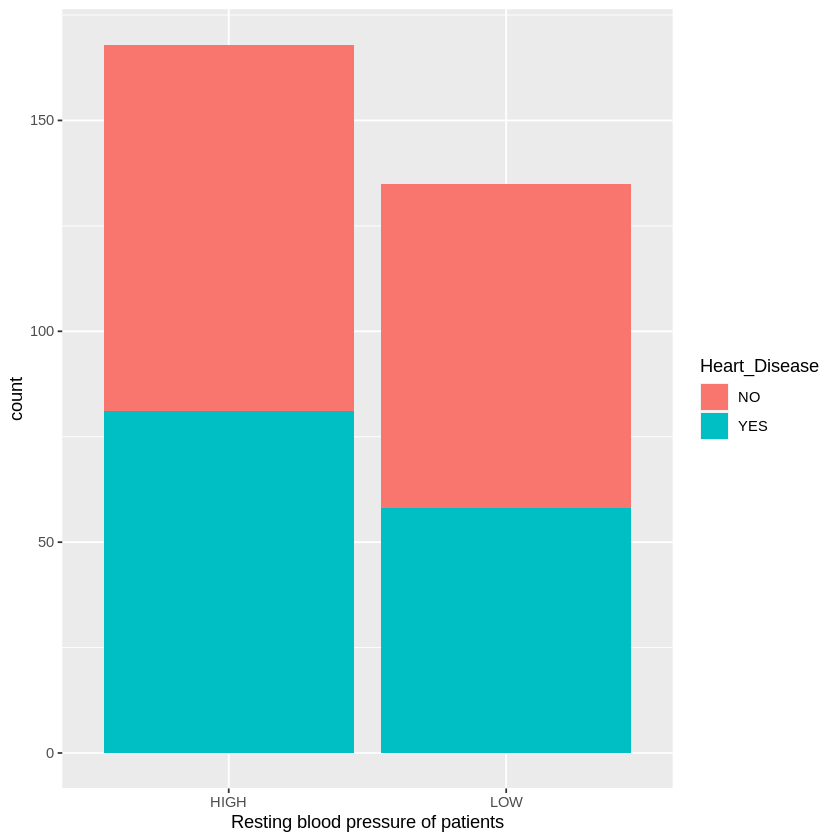

trestbps,Heart_Disease,n,p
<chr>,<chr>,<int>,<dbl>
HIGH,NO,87,0.2871287
HIGH,YES,81,0.2673267
LOW,NO,77,0.2541254
LOW,YES,58,0.1914191


chol,Heart_Disease,n,p
<chr>,<chr>,<int>,<dbl>
HIGH,NO,72,0.2376238
HIGH,YES,79,0.2607261
LOW,NO,92,0.3036304
LOW,YES,60,0.1980198


  Trestbps Heart_Disease proportion
1     HIGH           YES  0.4821429
2      LOW           YES  0.4296296
  Chol Heart_Disease proportion
1 HIGH           YES  0.5231788
2  LOW           YES  0.3947368


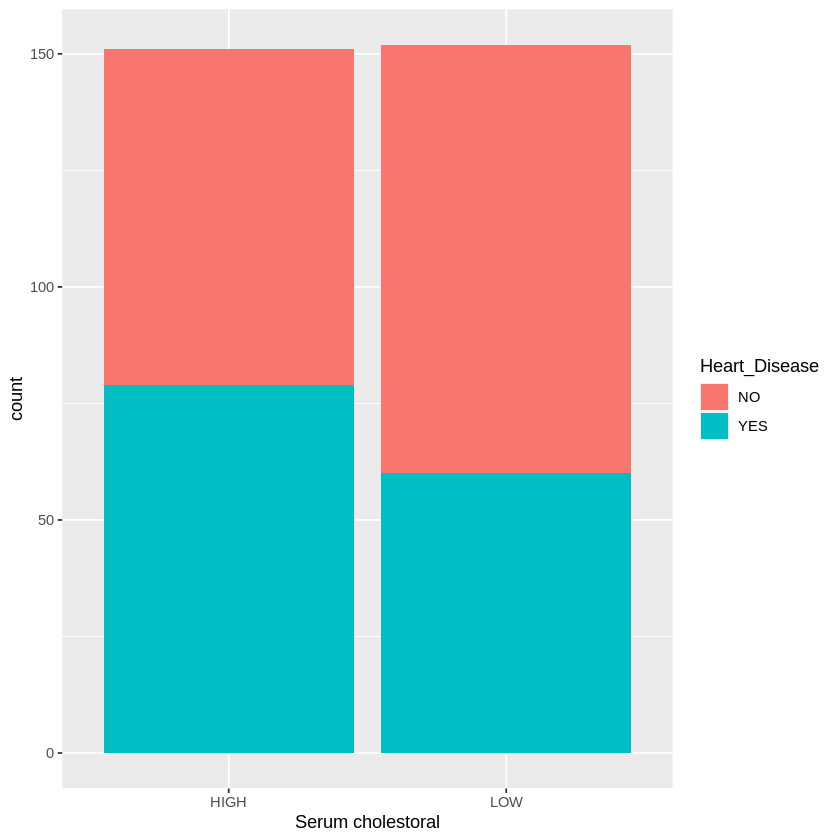

In [11]:
heart_data_untidy <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
              col_names = FALSE) %>%
              mutate(X12 = as.numeric(X12), X13 = as.numeric(X13))



colnames(heart_data_untidy) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak",
                          "slope", "ca", "thal", "Class")

#selects the 3 attributes that will be used as explanatory variable(trestbps, and chol) and response variable(Class) 
heart_data_selected <- heart_data_untidy%>%
select(trestbps, chol,  Class)
head(heart_data_selected)
trestbps50 = unname(quantile(heart_data_selected$trestbps,0.5))
chol50 = unname(quantile(heart_data_selected$chol,0.5))


heart_data_lowhigh <- heart_data_selected %>% 
                        mutate(trestbps = ifelse((trestbps >= trestbps50), "HIGH","LOW"),
                              chol = ifelse(chol > chol50, "HIGH", "LOW"))
                              
#We identified patients with class data higher than 0 as having heart disease and indicated this result 
#with "YES" (and vice versa with "NO"). Also change the data type from number to factor
heart_data <- heart_data_lowhigh %>%
            mutate(Heart_Disease = ifelse(Class > 0, "YES","NO")) %>%
            select(!Class


#Split heart_data into two data frames
heart_data_trestbps <- heart_data%>%
                       select("trestbps","Heart_Disease")
#outputs the first 6 rows of the data frame and heart_data is the data frame we will eventually use
heart_data_chol <- heart_data%>%
                    select("chol","Heart_Disease")
head(heart_data)
head(heart_data_trestbps)
head(heart_data_chol)
ggplot(heart_data, 
       aes(x = trestbps, fill = Heart_Disease)) +
  geom_bar() + 
  labs(x = "Resting blood pressure of patients")

ggplot(heart_data, 
       aes(x = chol, fill = Heart_Disease)) +
  geom_bar() + 
  labs(x = "Serum cholestoral")

#Generate the percentage of two variables under a four-column combination
heart_data_n <- heart_data %>%
                      tally()%>%
                        pull()

#proportion of the four combinations of low or high resting blood pressure 
#and presence or absence of heart disease.
heart_data_prop_trestbps <-heart_data %>% 
                             group_by(trestbps, Heart_Disease)%>%
                             count() %>% 
                             mutate(p = n/heart_data_n)

#the proportion of the four combinations of the low or high cholesterol and 
#the presence or absence of heart disease.
heart_data_prop_chol <- heart_data %>% 
                          group_by(chol, Heart_Disease)%>%
                          count() %>% 
                          mutate(p = n/heart_data_n)

trest_high_yes <- heart_data_prop_trestbps %>%
                    filter(trestbps=="HIGH", Heart_Disease=="YES")%>% ungroup() %>% select(n) %>% as.numeric()

trest_high_no <- heart_data_prop_trestbps %>%
                    filter(trestbps=="HIGH", Heart_Disease=="NO")%>% ungroup() %>% select(n) %>% as.numeric()

trest_low_yes <- heart_data_prop_trestbps %>%
                    filter(trestbps=="LOW", Heart_Disease=="YES")%>% ungroup() %>% select(n) %>% as.numeric()

trest_low_no <- heart_data_prop_trestbps %>%
                    filter(trestbps=="LOW", Heart_Disease=="NO")%>% ungroup() %>% select(n) %>% as.numeric()

chol_high_yes <- heart_data_prop_chol %>%
                    filter(chol=="HIGH", Heart_Disease=="YES")%>% ungroup() %>% select(n) %>% as.numeric()
chol_high_no <- heart_data_prop_chol %>%
                    filter(chol=="HIGH", Heart_Disease=="NO")%>% ungroup() %>% select(n) %>% as.numeric()
chol_low_yes <- heart_data_prop_chol %>%
                    filter(chol=="LOW", Heart_Disease=="YES")%>% ungroup() %>% select(n) %>% as.numeric()
chol_low_no <- heart_data_prop_chol %>%
                    filter(chol=="LOW", Heart_Disease=="NO")%>% ungroup() %>% select(n) %>% as.numeric()

heart_data_prop_trestbps
heart_data_prop_chol

#Generate the proportion of patients with heart disease with or without high resting blood pressure
Trestbps <- c("HIGH","LOW")
Heart_Disease <- c("YES","YES")
proportion <- c(trest_high_yes/(trest_high_yes+trest_high_no),trest_low_yes/(trest_low_yes+trest_low_no))
heart_data_prop_trestbps_1 <- data.frame(Trestbps,Heart_Disease,proportion)
print(heart_data_prop_trestbps_1)
#Generate the proportion of patients with heart disease with or without high cholesterol
Chol <- c("HIGH","LOW")
proportion <- c(chol_high_yes/(chol_high_yes+chol_high_no),chol_low_yes/(chol_low_yes+chol_low_no))
heart_data_prop_chol_1 <- data.frame(Chol,Heart_Disease,proportion)
print(heart_data_prop_chol_1)




***start here !!!!!!!!!***

In [12]:

obs_pop_diff_trestbps <- heart_data_prop_trestbps_1$proportion[1] -
heart_data_prop_trestbps_1$proportion[2]
obs_pop_diff_chol <- heart_data_prop_chol_1$proportion[1] - heart_data_prop_chol_1$proportion[2]
obs_pop_diff_trestbps
obs_pop_diff_chol

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '^'
1: **
    ^


***Null hypothesis and alternative hypothesis***

p1 : proportion of people having heart disease with low resting blood pressure

p2 : proportion of people having heart disease with high restingblood  blood pressure

H0_trestbps: p2  = p1

H1_trestbps:p2 > p1


p3 : proportion of people having heart disease with low cholesterol level

p4: proportion of people having heart disease with high cholesterol level


H0_chol: p4−p3=0

H1_chol : p4−p3>0

p_value
<dbl>
0.21


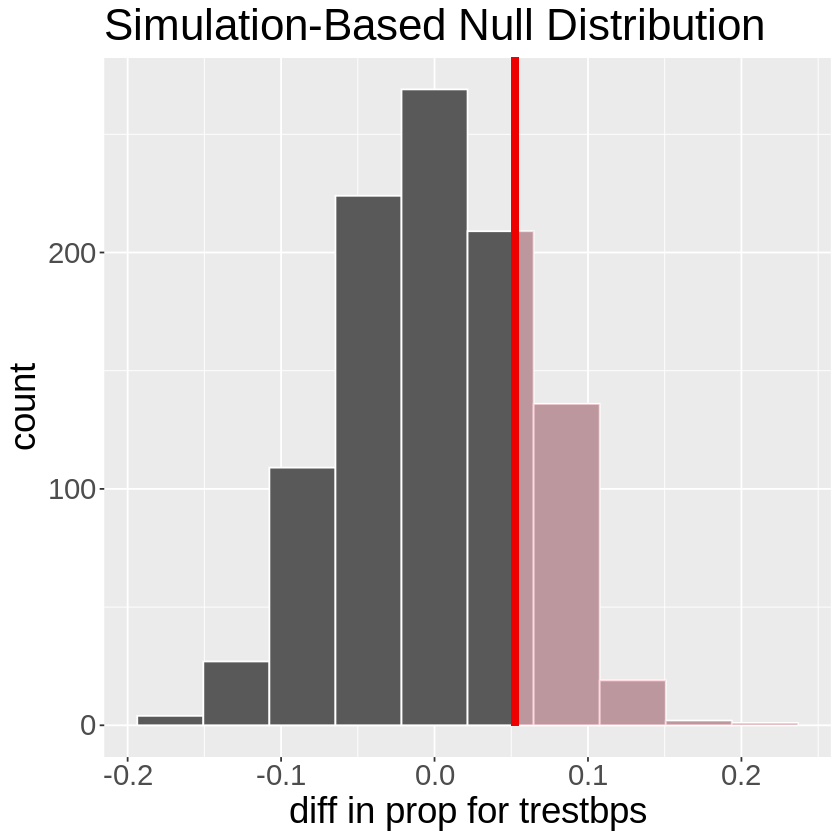

In [5]:
#the estimates after taking 1000 replicates of "shuffles" and assuming the null hypothesis is true
null_distribution_trestbps <- heart_data %>% 
    specify(formula = Heart_Disease ~ trestbps, success = "YES") %>% 
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in props", order = c("HIGH", "LOW"))

result_p_value_trestbps <- null_distribution_trestbps%>%
    get_p_value(obs_stat = obs_pop_diff_trestbps, direction = "right")
result_p_value_trestbps
result_plot_trestbps <- 
    visualize(null_distribution_trestbps, bins = 10) + 
    shade_p_value(obs_stat = obs_pop_diff_trestbps, direction = "right") +
    theme(text = element_text(size = 22)) +
    xlab("diff in prop for trestbps")

result_plot_trestbps

p_value
<dbl>
0.017


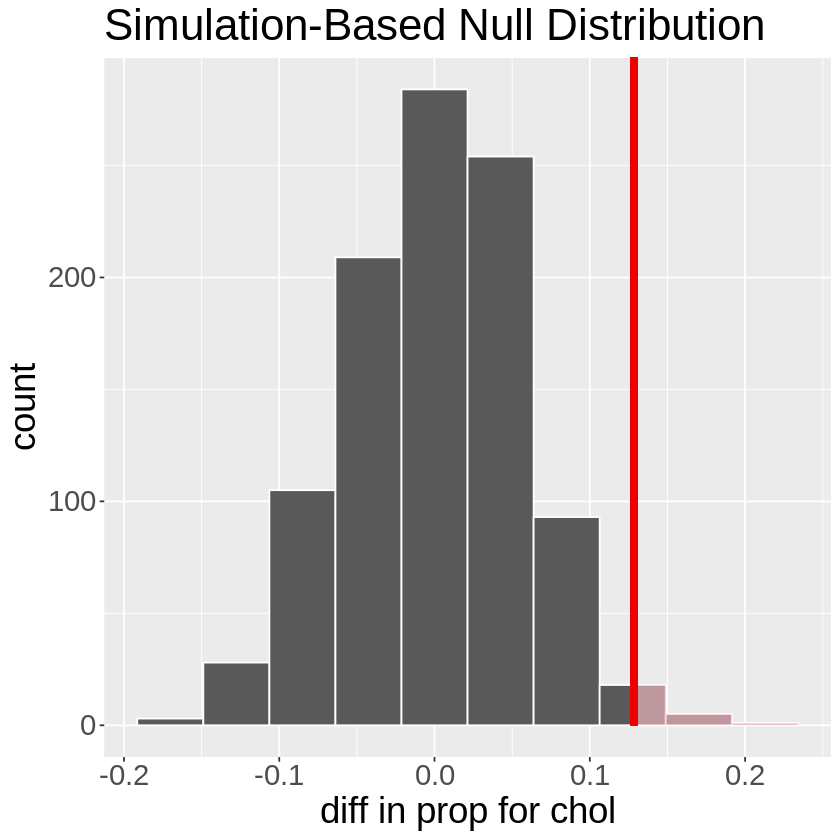

In [6]:
null_distribution_chol <- heart_data %>% 
    specify(formula = Heart_Disease ~ chol, success = "YES") %>% 
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in props", order = c("HIGH", "LOW"))


result_p_value_chol <- null_distribution_chol%>%
    get_p_value(obs_stat = obs_pop_diff_chol, direction = "right")
result_p_value_chol

result_plot_chol <- 
    visualize(null_distribution_chol, bins = 10) + 
    shade_p_value(obs_stat = obs_pop_diff_chol, direction = "right") +
    theme(text = element_text(size = 22)) +
    xlab("diff in prop for chol")

result_plot_chol

In this part, bootstrapping is used to test whether there is an association between having high chol and having heart disease, and whether there is an association between having high resting blood pressure and having heart disease. Since we are testing the independence of two variables, we use `"Independence"` in the null hypothesis, and 1000 replications are statistically large enough when creating the sample. Also, I chose `type = "permute"` to create the sample here instead of `type = "bootstrap"`. At the same time, I got observe statistics by simply processing the heart_data_prop_trestbps_1 and heart_data_prop_chol_1 data frames. finally `visualize` and `get_p_value` were used to visualize and get the p-value

***Result***

95% confidence interval and a significance level of 0.05 will be used here.
Since 0.217(result_p_value_trestbps)>0.05 so we fail to reject H0_trestbps. Since 0.017(result_p_value_chol)<0.05 so we reject H0_chol and accept H1_chol

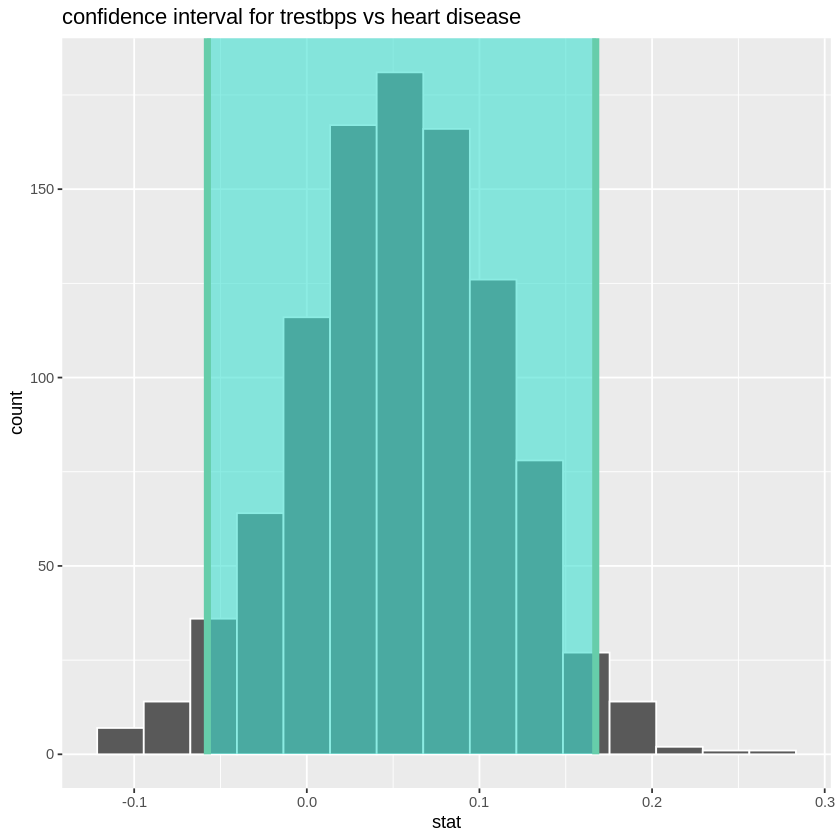

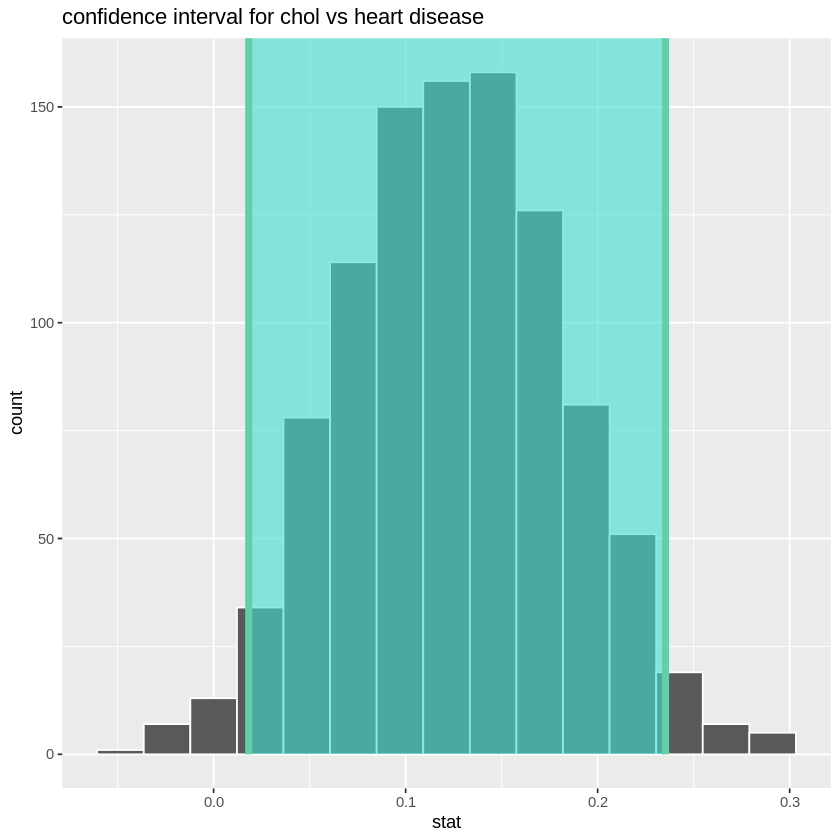

In [8]:
null_distribution_trestbps_0 <- heart_data %>% 
    specify(formula = Heart_Disease ~ trestbps, success = "YES") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in props", order = c("HIGH", "LOW"))

percentile_ci_trestbps <- null_distribution_trestbps_0 %>% 
  get_confidence_interval(level = 0.95, type = "percentile")

null_distribution_chol_0 <- heart_data %>% 
    specify(formula = Heart_Disease ~ chol, success = "YES") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in props", order = c("HIGH", "LOW"))

percentile_ci_chol <- null_distribution_chol_0 %>% 
  get_confidence_interval(level = 0.95, type = "percentile")

visualize(null_distribution_trestbps_0) + 
  shade_confidence_interval(endpoints = percentile_ci_trestbps)+
ggtitle("confidence interval for trestbps vs heart disease")


visualize(null_distribution_chol_0) + 
  shade_confidence_interval(endpoints = percentile_ci_chol)+
ggtitle("confidence interval for chol vs heart disease")

The above two figures show that the 0 in the first figure is included in the 95% confidence interval (green shaded part), however, the 0 in the second figure is not included in the 95% confidence interval, which proves that p1  is equal to p2 however p4 is larger than to p3.